# House Price Prediction using Linear Regression

## Objective
Build a linear regression model to predict house prices based on features like size, location, and number of rooms.

## Step 1: Load and Explore the Dataset
We begin by importing necessary libraries and loading the dataset.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Step 2: Load and Inspect Dataset

In [39]:
# Load the dataset
df = pd.read_csv("house_prices.csv")
# Preview the data
df.head()
# Display basic information about the dataset
df.info()
# Display statstics of the dataset
df.describe()
#check for missing values
df.isnull().sum()
# display the columns of the dataframe
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Size             15 non-null     int64 
 1   Location         15 non-null     object
 2   Number of Rooms  15 non-null     int64 
 3   Price            15 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 612.0+ bytes
Index(['Size', 'Location', 'Number of Rooms', 'Price'], dtype='object')


## Step 3: Handle Missing Values
We'll fill:
- Numerical columns with median
- Categorical columns with mode

In [40]:
# Fill missing numerical values with median
df['Size'] = df['Size'].fillna(df['Size'].median())
df['Number of Rooms'] = df['Number of Rooms'].fillna(df['Number of Rooms'].median())

# Fill missing categorical values with mode
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])

## Step 4: Visualize Distributions & Outliers

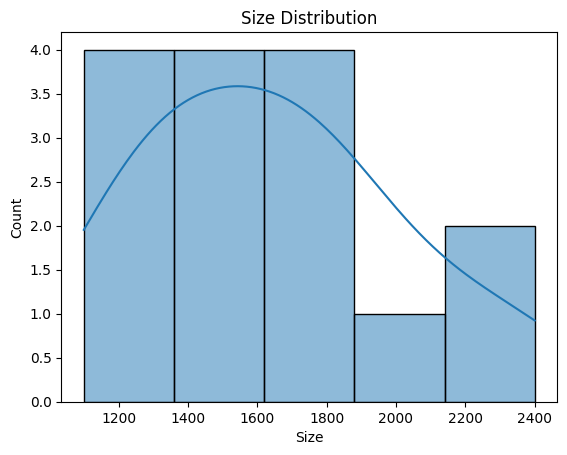

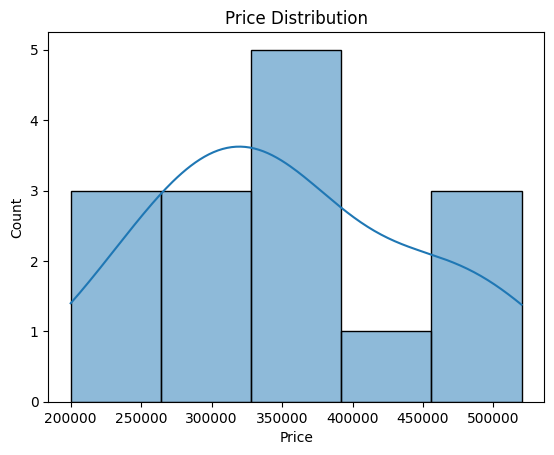

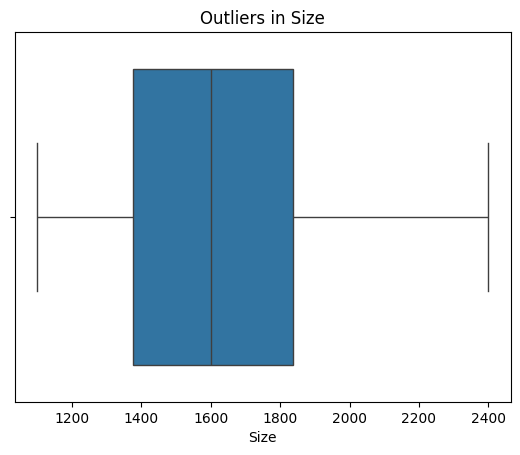

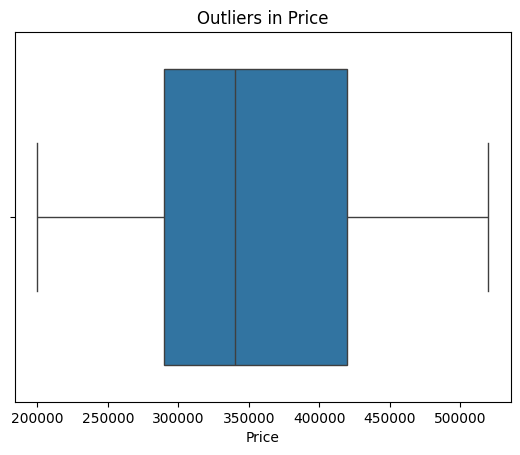

In [41]:
# Distributions
sns.histplot(df['Size'], kde=True)
plt.title("Size Distribution")
plt.show()

sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution")
plt.show()

# Outlier detection
sns.boxplot(x=df['Size'])
plt.title("Outliers in Size")
plt.show()

sns.boxplot(x=df['Price'])
plt.title("Outliers in Price")
plt.show()


##  Step 5: Encode and Scale Data
- One-hot encode 'Location'
- Standard scale 'Size' and 'Number of Rooms'

In [42]:
# Encode location
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

# Scale numerical values
scaler = StandardScaler()
df[['Size', 'Number of Rooms']] = scaler.fit_transform(df[['Size', 'Number of Rooms']])

## Step 6: Correlation Analysis
Check how each feature is related to the target `Price`.

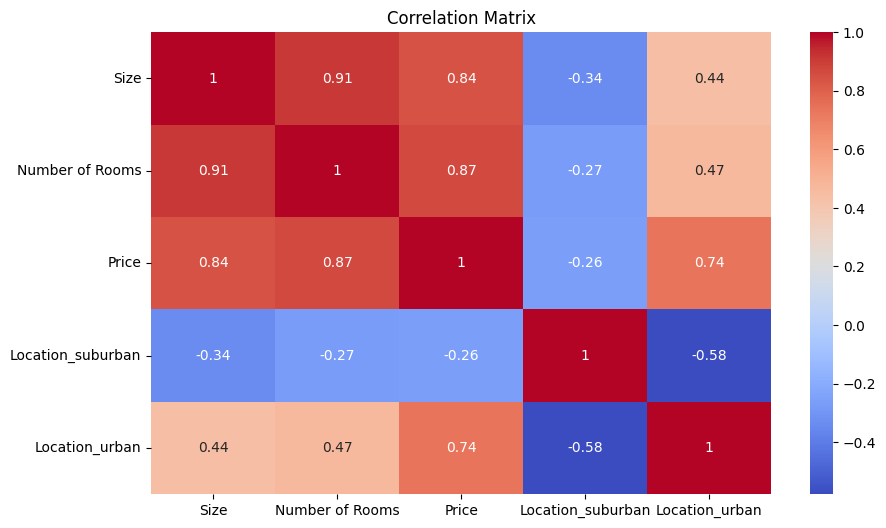

In [43]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Step 7: Model Training
- Split data into training and test sets
- Train a Linear Regression model

In [44]:
# Define input and output
X = df.drop('Price', axis=1)
y = df['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Step 8: Evaluate the Model
- Predict on test set
- Evaluate using RMSE and R²
- Plot actual vs predicted

In [45]:
# Predictions
y_pred = model.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


RMSE: 38115.07
R²: -0.52


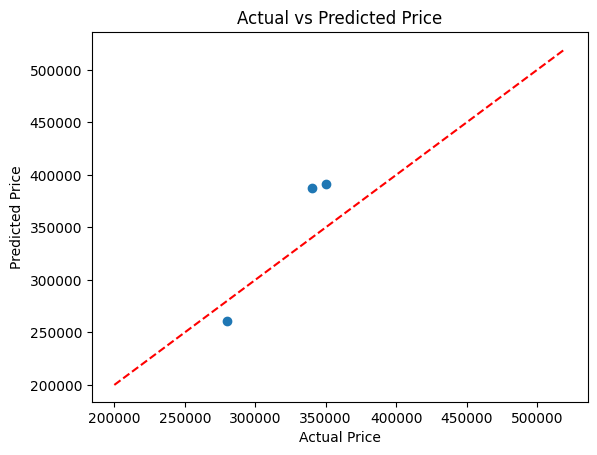

In [46]:
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()


## Step 9: Feature Importance (Coefficients)
Which features influence the prediction the most?

In [47]:
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coeff_df.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
3,Location_urban,133260.499687
2,Location_suburban,57927.823050
1,Number of Rooms,33485.126852
0,Size,21943.146209


# Summary & Insights

### Key Takeaways:
- **Size** is the strongest predictor of price.
- **Urban Location** significantly increases price.
- **Model Accuracy**:
  - RMSE gives the average prediction error.
  - R² shows how well the model explains the variability in price.
